<a href="https://colab.research.google.com/github/SuhailAhmad1/Machine_learning/blob/main/Classification_LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Important Libraries**

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay, classification_report

# Importing DataSet

In [3]:
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X_pd.to_numpy()
y = y_pd.to_numpy()

**splitting data into train and test set**

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# **Logistic Regression | Binary 0 detector**

**Conveting Label into two class. 1 for 0's and 0 for all others**

In [5]:
y_train_0 = np.zeros(len(y_train))
y_test_0 = np.zeros(len(y_test))

index_0 = np.where(y_train == '0')
y_train_0[index_0] = 1

index_0 = np.where(y_test == '0')
y_test_0[index_0] = 1

In [6]:
print(y_train)
print(y_train_0)

['5' '0' '4' ... '5' '6' '8']
[0. 1. 0. ... 0. 0. 0.]


In [7]:
print(y_test[10:20])
print(y_test_0[10:20])

['0' '6' '9' '0' '1' '5' '9' '7' '3' '4']
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


**LogisticRegression without regularization**

In [ ]:
pipe_0 = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=1729,
                             solver="lbfgs",
                             C=np.infty))
pipe_0.fit(X_train, y_train_0)

**Training Model and Using GridSearchCV for hyperparameter seaching**

In [ ]:
grid_Cs = [0, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]

pipe = Pipeline([('scalar', MinMaxScaler()),
                     ("logistic", LogisticRegression(C=1.0, random_state=1729))])

pipe_logit_cv = GridSearchCV(
    pipe,
    param_grid={'logistic__C': grid_Cs},
    scoring="f1",
    )

pipe_logit_cv.fit(X_train, y_train_0)

In [13]:
pipe_logit_cv.best_params_

{'logistic__C': 0.1}

In [14]:
pipe_logit_cv.best_score_

0.9579654953103655

In [15]:
pipe_logit_cv.best_estimator_

Pipeline(steps=[('scalar', MinMaxScaler()),
                ('logistic', LogisticRegression(C=0.1, random_state=1729))])

**Using LogisticRegressionCv for getting the best parameters for our model**

In [ ]:
estimator = LogisticRegressionCV(cv=5, scoring='f1',random_state=1729)
logit_cv = make_pipeline(MinMaxScaler(), estimator)
logit_cv.fit(X_train, y_train_0)

# Performence Evaluation of these three pipelines

In [20]:
y_0_test = pipe_0.predict(X_test)
y_1_test = pipe_logit_cv.best_estimator_.predict(X_test)
y_2_test = logit_cv.predict(X_test)

In [25]:
print("Model1(Without Regularization)--> Precison : ",precision_score(y_test_0, y_0_test), " Recall : ", recall_score(y_test_0, y_0_test))
print("Model2(With GridSearchCV)--> Precison : ",precision_score(y_test_0, y_1_test), " Recall : ", recall_score(y_test_0, y_1_test))
print("Model1(With LogisticRegressionCV)--> Precison : ",precision_score(y_test_0, y_2_test), " Recall : ", recall_score(y_test_0, y_2_test))

Model1(Without Regularization)--> Precison :  0.9515151515151515  Recall :  0.9612244897959183
Model2(With GridSearchCV)--> Precison :  0.9564336372847011  Recall :  0.963265306122449
Model1(With LogisticRegressionCV)--> Precison :  0.9546370967741935  Recall :  0.9663265306122449


# Confusion Matrix For These Three Models

1. For Model 1... Without Regularization

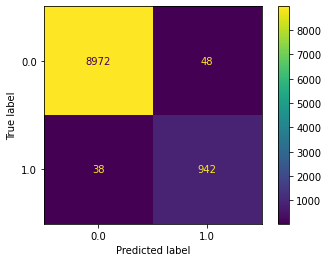

In [28]:
cm1 = ConfusionMatrixDisplay.from_predictions(y_test_0, y_0_test, values_format='.5g')

--------------------------------------------------------
2.For Model 2.... With GridSearchCV

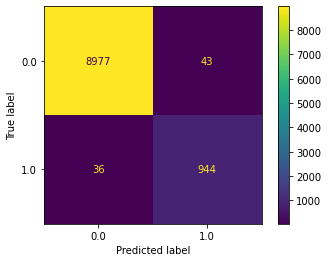

In [29]:
cm2 = ConfusionMatrixDisplay.from_predictions(y_test_0, y_1_test, values_format='.5g')

----------------------------------------------
3.For Model3................... With LogisticRegressionCV

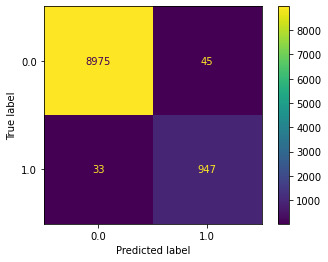

In [30]:
cm3 = ConfusionMatrixDisplay.from_predictions(y_test_0, y_2_test, values_format='.5g')

# **RidgeClassier**

**For Ridge Classifier Changing Labels into +1 and -1, +1 for 0s and -1 for all other classes**

In [31]:
y_train_00 = -1*np.ones(len(y_train))
y_test_00 = -1*np.ones(len(y_test))

index_0 = np.where(y_train == '0')
y_train_00[index_0] = 1

index_0 = np.where(y_test == '0')
y_test_00[index_0] = 1

In [34]:
print(y_train)
print(y_train_00)

['5' '0' '4' ... '5' '6' '8']
[-1.  1. -1. ... -1. -1. -1.]


In [35]:
print(y_test[10:20])
print(y_test_00[10:20])

['0' '6' '9' '0' '1' '5' '9' '7' '3' '4']
[ 1. -1. -1.  1. -1. -1. -1. -1. -1. -1.]


**RidgeClassifier**

In [36]:
from sklearn.linear_model import RidgeClassifier

In [44]:
estimator = RidgeClassifier(normalize=False, alpha=0)
pipe_ridge = make_pipeline(MinMaxScaler(), estimator)
pipe_ridge.fit(X_train, y_train_00)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))])

In [45]:
y_hat_r = pipe_ridge.predict(X_test)
print(classification_report(y_test_00, y_hat_r))

              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99      9020
         1.0       0.95      0.88      0.91       980

    accuracy                           0.98     10000
   macro avg       0.97      0.94      0.95     10000
weighted avg       0.98      0.98      0.98     10000



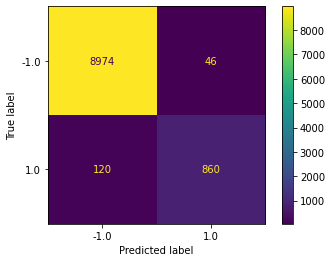

In [54]:
cm = ConfusionMatrixDisplay.from_predictions(y_test_00, y_hat_r)

Cross Validate

In [47]:
from pprint import pprint
cv_bin_ridge = cross_validate(
    pipe_ridge, X_train, y_train_00,
    cv=5, scoring=['precision', 'recall', 'f1'],
    return_train_score = True,
    return_estimator=True
)
pprint(cv_bin_ridge)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave 

{'estimator': [Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))]),
               Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))])],
 'fit_time': array([10.73613667, 10.59751058, 10.6917963 , 10.68421388, 10.6440835 ]),
 'score_time': array([0.10539794, 0.08716774, 0.098279  , 0.08655119, 0.08667755]),
 'test_f1': array([0.9123734 , 0.90260026, 0.91596265, 0.90429338, 0.90982143]),
 'test_preci

In [48]:
best_estimator_id = np.argmax(cv_bin_ridge['train_f1'])
best_estimator_id

3

In [50]:
best_estimator = cv_bin_ridge["estimator"][3]
best_estimator

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('ridgeclassifier', RidgeClassifier(alpha=0, normalize=False))])

Performence Evaluation

In [51]:
y_hat_000 = best_estimator.predict(X_test)
print(classification_report(y_test_00, y_hat_000))

              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99      9020
         1.0       0.95      0.88      0.91       980

    accuracy                           0.98     10000
   macro avg       0.97      0.94      0.95     10000
weighted avg       0.98      0.98      0.98     10000



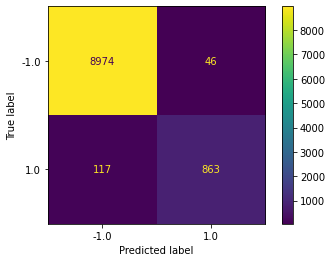

In [52]:
cm = ConfusionMatrixDisplay.from_predictions(y_test_00, y_hat_000)

# **LogisticRegression For MultiClass**

In [ ]:
pipe_logit_all = make_pipeline(MinMaxScaler(), LogisticRegression(random_state=1729,
                                                                solver='lbfgs',
                                                                C=np.infty))
pipe_logit_all.fit(X_train,y_train)

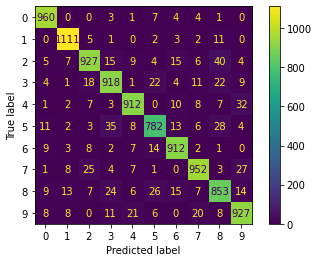

In [60]:
y_hat = pipe_logit_all.predict(X_test)
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

In [61]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.91      0.88      0.89       892
           6       0.93      0.95      0.94       958
           7       0.94      0.93      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000

